In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
#warnings
import warnings
warnings.filterwarnings('ignore')

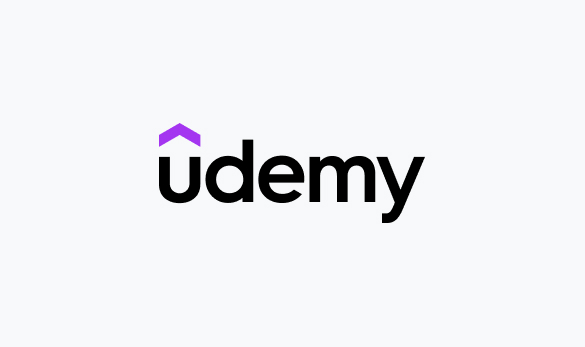

In [66]:
from IPython.display import Image, display

# Load and display an image
image_path = "/content/udemy_image.jpg"  # Replace with your image path
img = Image(filename=image_path)
display(img)

#Load  Udemy Dataset

In [67]:
df=pd.read_csv('/content/udemy_online_education_courses_dataset.csv')

In [68]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [69]:
#shape of dataset
df.shape

(3678, 12)

#Explotary data analysis

In [70]:
#check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [71]:
#check the null values
df.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


In [72]:
#check the duplicated rows
df.duplicated().sum()

6

In [73]:
#drop the duplicates
df.drop_duplicates(inplace=True)

In [74]:
#drop the unnessary column
df.drop(columns={'course_id','url'},axis=1,inplace=True)

In [75]:
#check the columns
df.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'published_timestamp',
       'subject'],
      dtype='object')

In [76]:
# Convert 'published_timestamp' to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [77]:
# Extract year and month
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month

In [78]:
#drop the published tmestamp
df.drop(columns={'published_timestamp'},axis=1,inplace=True)

In [79]:
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year,month
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance,2017,1
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance,2017,3
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016,12
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017,5
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016,12


In [80]:
#top 10 course as per price as bar chart
top_10_courses_by_price=df.sort_values(by='price',ascending=False).head(10)
# Selecting only 'course_title' and 'price' columns
top_10_courses_by_price = top_10_courses_by_price[['course_title', 'price']]

# Displaying the result
print(top_10_courses_by_price)

                                           course_title  price
0                    Ultimate Investment Banking Course    200
3409  Complete Login and Registration System in PHP ...    200
2653  Learn to code, Become a Web Developer and Mast...    200
2651                  HTML and HTML5 For Beginners 2016    200
304   Situational Trading: Proven Option Strategy fo...    200
2636  PHP OOP: Object Oriented Programming for begin...    200
3404                     How to become an App Developer    200
2631   Interactive Dynamic JavaScript for beginners DOM    200
2624  Drupal Tutorial : Drupal 8 Beginner to Expert ...    200
2621            The Ultimate Web Developer How To Guide    200


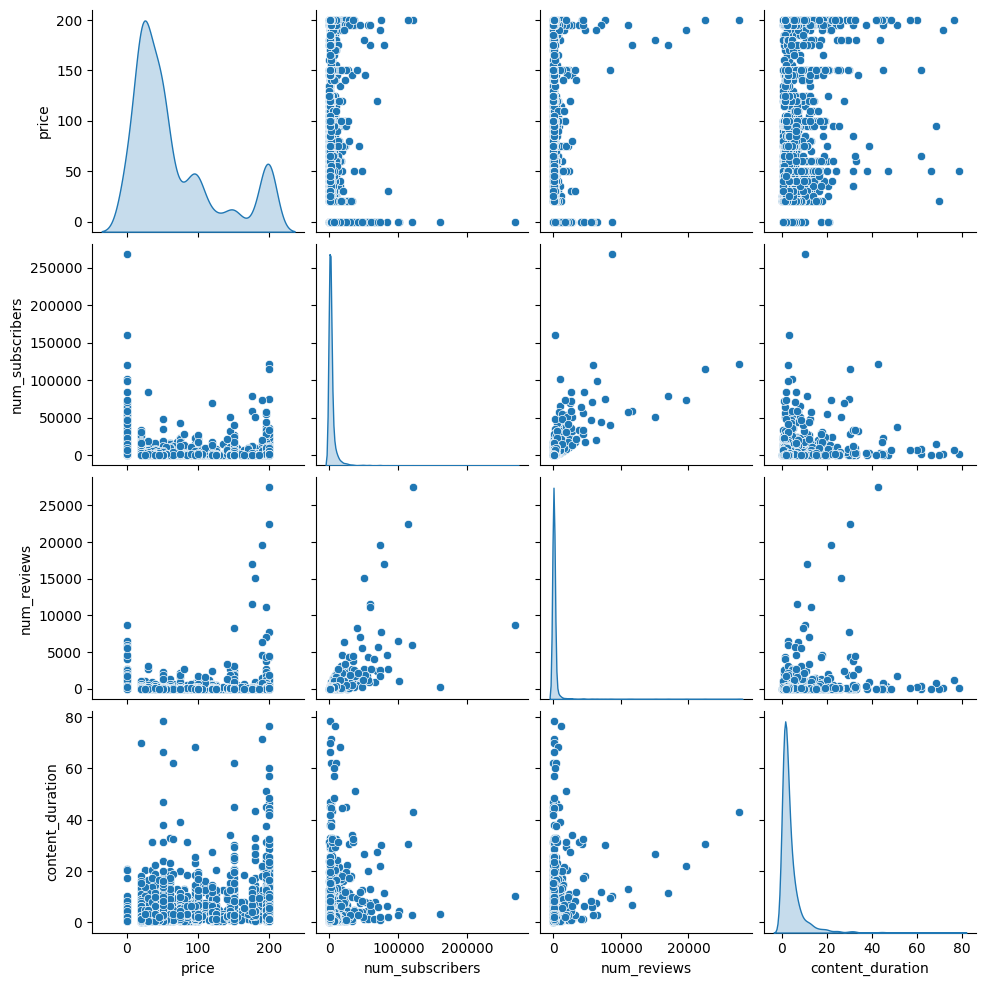

In [81]:
# Pairplot for key numeric columns
sns.pairplot(df[['price', 'num_subscribers', 'num_reviews', 'content_duration']], diag_kind='kde')
plt.show()


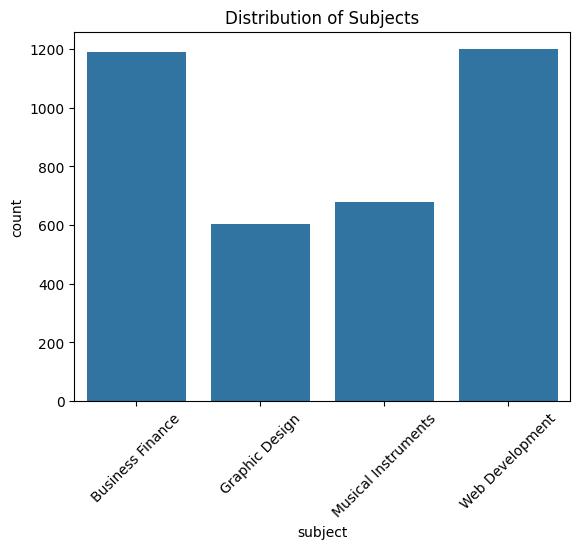

In [82]:
# Count plot for 'subject'
sns.countplot(x='subject', data=df)
plt.title('Distribution of Subjects')
plt.xticks(rotation=45)
plt.show()

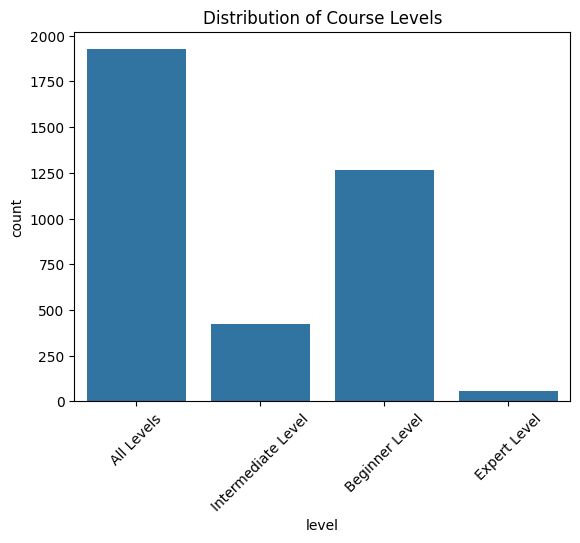

In [83]:
# Count plot for 'level'
sns.countplot(x='level', data=df)
plt.title('Distribution of Course Levels')
plt.xticks(rotation=45)
plt.show()

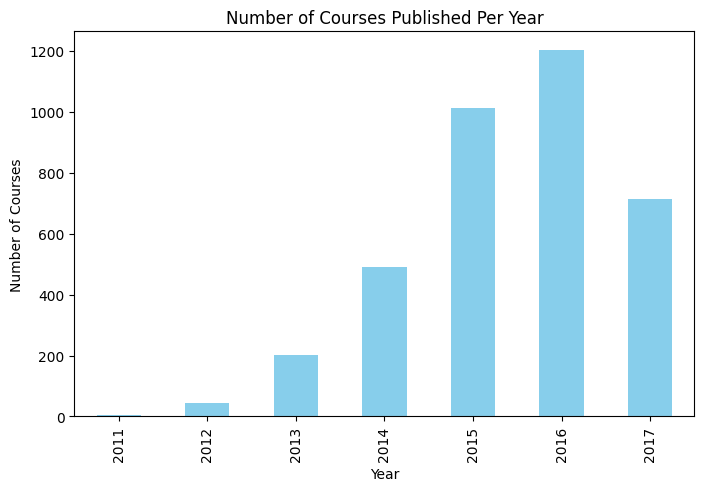

In [84]:
# Bar plot for number of courses published per year
courses_per_year = df['year'].value_counts().sort_index()
courses_per_year.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Number of Courses Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.show()

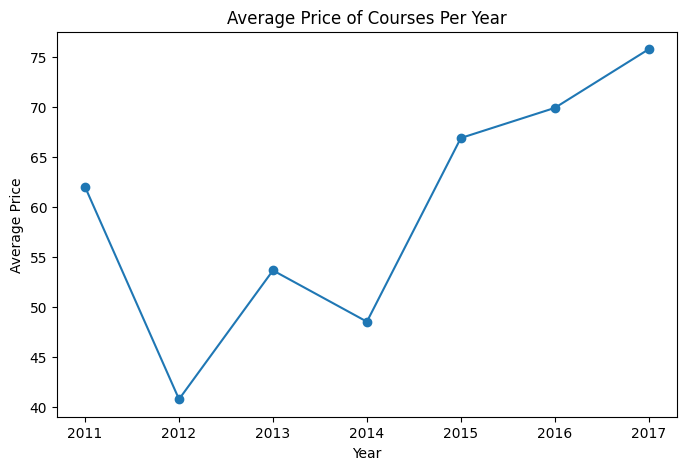

In [85]:
# Line plot for average price of courses per year
avg_price_per_year = df.groupby('year')['price'].mean()
avg_price_per_year.plot(kind='line', figsize=(8, 5), marker='o')
plt.title('Average Price of Courses Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Number of subscriber per subject

In [86]:
# Define coloring functions for subject and level (for Notebook display only)
def color_subject(val):
    return 'color: red;' if val else None

def color_level(val):
    return 'color: blue;' if val else None

# Top 3 courses by number of subscribers for each subject and level
top_courses = (
    df[df['is_paid']]  # Filter for paid courses
    .groupby(['subject', 'level'])
    .apply(lambda x: x.nlargest(3, 'num_subscribers'))
    .reset_index(drop=True)
    .sort_values(by=['subject', 'level', 'num_subscribers', 'course_title'], ascending=[True, True, False, True])
    .reset_index(drop=True)
)

# Display with optional styling (for Jupyter Notebooks)
top_courses_styled = (
    top_courses.style
    .applymap(color_subject, subset=['subject'])
    .applymap(color_level, subset=['level'])
    .background_gradient(subset=['num_subscribers'], cmap='viridis')
)

# Display in a notebook or save to CSV if needed
top_courses_styled


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year,month
0,The Complete Financial Analyst Course 2017,True,195,24481,2347,174,All Levels,10.000000,Business Finance,2016,1
1,Beginner to Pro in Excel: Financial Modeling and Valuation,True,195,22257,2697,138,All Levels,7.500000,Business Finance,2014,11
2,Black Algo Trading: Build Your Trading Robot,True,200,20195,1113,227,All Levels,16.000000,Business Finance,2014,10
3,Forex Trading A-Z™ - With LIVE Examples of Forex Trading,True,195,16900,2476,52,Beginner Level,5.500000,Business Finance,2014,12
4,Learn to Trade for Profit:Trading with Japanese Candlesticks,True,60,16385,273,45,Beginner Level,3.000000,Business Finance,2014,9
5,Options Trading Introduction: Day Trade Stock Options,True,95,12394,218,30,Beginner Level,2.500000,Business Finance,2015,2
6,Options Trading 3 : Advanced Stock Profit and Success Method,True,195,5172,34,38,Expert Level,2.500000,Business Finance,2015,5
7,Elliott Wave -Forex Trading With The Elliott Wave Theory,True,90,4022,35,14,Expert Level,1.000000,Business Finance,2016,12
8,[Value Investing] Where White People Keep Their Money,True,200,2715,70,20,Expert Level,4.000000,Business Finance,2016,5
9,Options Trading Stocks: Proven Toolbox For Financial Success,True,195,7884,118,68,Intermediate Level,10.000000,Business Finance,2015,5


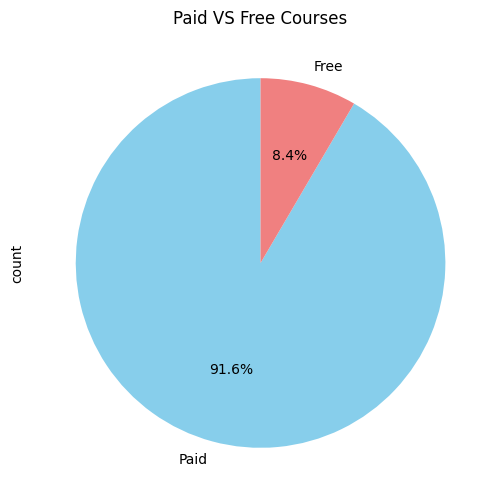

In [87]:
#pie chart is_paid column
plt.figure(figsize=(6, 6))
df['is_paid'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,labels=['Paid', 'Free'], colors=['skyblue', 'lightcoral'])
plt.title('Paid VS Free Courses')
plt.show()


In [90]:
df['is_paid'].value_counts()

,count
is_paid,
True,3362
False,310


Text(0, 0.5, 'Frequency')

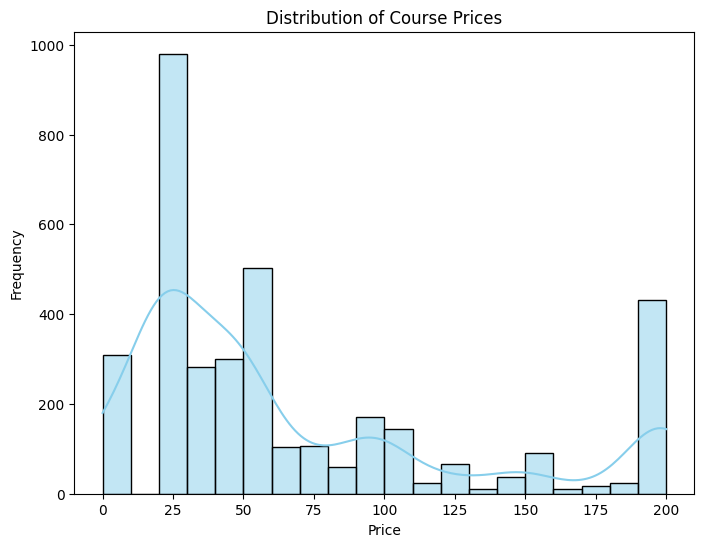

In [88]:
#price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [93]:
# Convert target column to numeric
df['is_paid'] = df['is_paid'].astype(int)

In [95]:
df['is_paid'].value_counts()

,count
is_paid,
1,3362
0,310


In [94]:
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year,month
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,1.5,Business Finance,2017,1
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,39.0,Business Finance,2017,3
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016,12
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,All Levels,3.0,Business Finance,2017,5
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016,12


#convert the object column to integer

In [96]:
#use label encoding
label_encoder=LabelEncoder()
df['subject']=label_encoder.fit_transform(df['subject'])
df['level']=label_encoder.fit_transform(df['level'])
df['course_title']=label_encoder.fit_transform(df['course_title'])

In [97]:
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year,month
0,3406,1,200,2147,23,51,0,1.5,0,2017,1
1,779,1,75,2792,923,274,0,39.0,0,2017,3
2,1206,1,45,2174,74,51,3,2.5,0,2016,12
3,444,1,95,2451,11,36,0,3.0,0,2017,5
4,1580,1,200,1276,45,26,3,2.0,0,2016,12


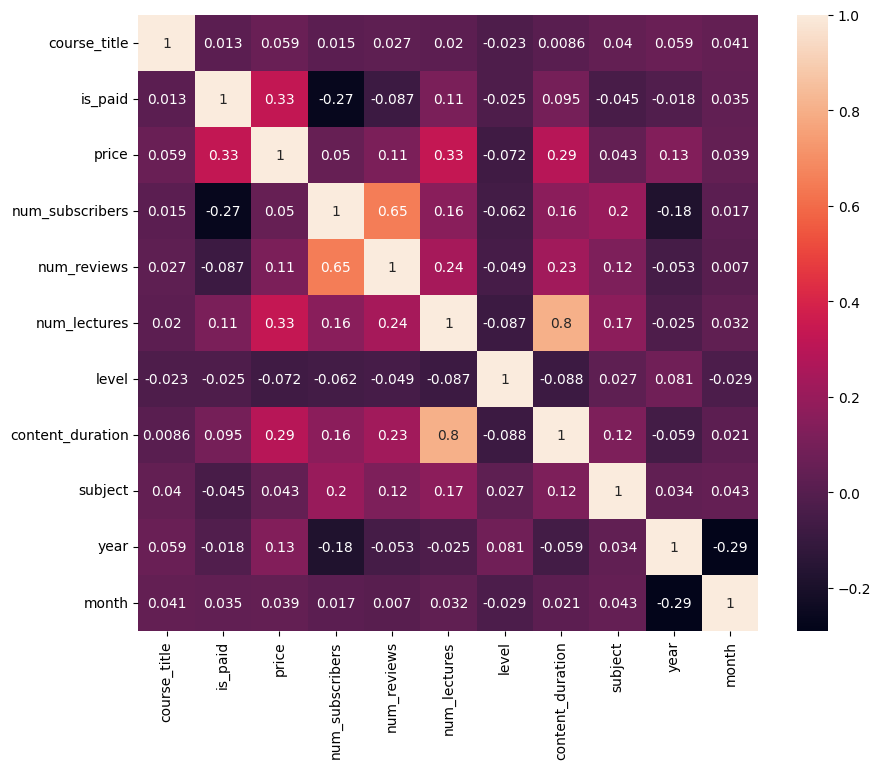

In [98]:
#check the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#Split the dataset

In [100]:
# Split features and target
X = df.drop(columns=['is_paid'])
y = df['is_paid']

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
#scaled the dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [103]:
# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       671

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735



In [104]:
#save model
import joblib
joblib.dump(model,'udemy_model.pkl')

['udemy_model.pkl']